In [90]:
import pandas as pd
import numpy as np
from sklearn.metrics import *
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

path_to_insults = '/Users/dattasainathd/Downloads/'
data2 = pd.read_csv(path_to_insults + 'final_train_nonbot.csv',na_values='0', encoding = "ISO-8859-1", nrows = 1477)

data2['no'] = 0
for x in range(0,data2.shape[0]):
    data2.loc[x, 'no']=x
print("Made a serial column which can be used for plotting purposes")  

print("Initializing two rows of Value with 0 & user with 1")
data2['Value'] = 0
data2['user'] = 1


Made a serial column which can be used for plotting purposes
Initializing two rows of Value with 0 & user with 1


In [91]:
data2

,id,id_str,screen_name,location,description,url,followers_count,friends_count,listedcount,created_at,...,lang,status,default_profile,default_profile_image,has_extended_profile,name,bot,no,Value,user
0,3.471604e+07,34716038,aaroncarter,Sony Recording Artist,NEW AARON CARTER MUSIC DOWNLOAD LINK LíVí EP...,NaN,571310.0,76070.0,4909.0,Thu Apr 23 20:15:49 +0000 2009,...,en,"{u'contributors': None, u'truncated': False, u...",False,False,True,Aaron Carter,NaN,0,0,1
1,3.013511e+06,3013511,michellebranch,NaN,"singer/songwriter, hopeless romantic, drinker ...",https://t.co/2vSKw7cmzC,292385.0,963.0,6076.0,Fri Mar 30 20:58:59 +0000 2007,...,en,"{u'contributors': None, u'truncated': False, u...",False,False,False,Michelle Branch,NaN,1,0,1
2,5.623762e+07,56237623,stronginmyfaith,NaN,NaN,NaN,1.0,7.0,NaN,7/13/09 0:38,...,en,"Status(contributors=None, truncated=False, tex...",True,True,False,laurie lindeman,NaN,2,0,1
3,2.796428e+07,27964284,Jessicaveronica,5th Dimension,"@TheVeronicas äÊ Wanderer, worshiper, if you ...",https://t.co/U6yNZoDZfu,222659.0,352.0,3261.0,Tue Mar 31 21:12:33 +0000 2009,...,en,"{u'contributors': None, u'truncated': False, u...",False,False,False,Jessica Veronica,NaN,3,0,1
4,5.528761e+08,552876065,resargento,brasil,meio ogra mas o cora_£o © de mocinha,NaN,646.0,446.0,2.0,4/13/12 17:37,...,pt,null,False,False,False,rebosta,NaN,4,0,1
5,3.810743e+09,3810742695,crazyl1f,NaN,NaN,NaN,2.0,5.0,NaN,Tue Sep 29 04:13:42 +0000 2015,...,zh-cn,"{'truncated': False, 'entities': {'user_mentio...",True,True,False,Songgaoyun Deng,NaN,5,0,1
6,1.531344e+09,1531343556,TaniasimonTania,Milano,"Mechanical engineer, F1 fan and traveler _ôë",NaN,27.0,25.0,NaN,6/19/13 16:46,...,it,"Status(in_reply_to_user_id=None, lang='en', co...",True,False,False,Tania Simon,NaN,6,0,1
7,1.289613e+09,1289612510,YCPRProf,ï£_-ä_ñ¥-Gamma Iota Advisor,"We are the music makers, and we are the dreame...",https://t.co/0qxQVQhyJq,316.0,192.0,9.0,3/22/13 20:39,...,en,"Status(in_reply_to_user_id=None, lang='en', co...",False,False,True,Dr. K. McBride,NaN,7,0,1
8,1.998091e+07,19980906,bandofhorses,NaN,'Why Are You OK' out now - https://t.co/G7QeyE...,https://t.co/KcS6ANtb3a,211616.0,8617.0,4071.0,Tue Feb 03 16:21:39 +0000 2009,...,en,"{u'contributors': None, u'truncated': False, u...",False,False,False,Band of Horses,NaN,8,0,1
9,3.782236e+08,378223565,sparker,SF / LA / NYC,"Napster, Plaxo, Facebook, Causes, Spotify & Ai...",https://t.co/OChMaSsvLB,429604.0,600.0,4999.0,Thu Sep 22 21:06:05 +0000 2011,...,en,{'created_at': 'Wed Feb 01 21:59:23 +0000 2017...,False,False,False,Sean Parker,NaN,9,0,1


In [92]:
print("Doing all the necessary changes for the data for evaluation")

data2 = data2.drop('created_at', axis=1)
data2.verified=data2.verified.astype(int)
data2.default_profile=data2.default_profile.astype(int)
data2.default_profile_image=data2.default_profile_image.astype(int)

data2 = data2.drop('status', axis=1)
data2 = data2.drop('id', axis=1)
data2 = data2.drop('id_str', axis=1)
data2 = data2.drop('url', axis=1)
data2 = data2.drop('has_extended_profile', axis=1)

data2.location.fillna('', inplace=True)
data2.description.fillna('', inplace=True)
data2.followers_count.fillna(0, inplace=True)
data2.friends_count.fillna(0, inplace=True)
data2.listedcount.fillna(0, inplace=True)
data2.statuses_count.fillna(0, inplace=True)
data2.favourites_count.fillna(0, inplace=True)
data2.followers_count=data2.followers_count.astype(int)

print("Did all the necessary changes for the data for evaluation")

Doing all the necessary changes for the data for evaluation
Did all the necessary changes for the data for evaluation


In [93]:
print("Checking for the 'bot' word")
data_description = data2['description'].str.lower()
data_name = data2['name'].str.lower()
data_screen_name = data2['screen_name'].str.lower()
bot = 'bot'

print("Checking for the 'bot' word in the screen names of the accounts")
count = 0
serial = -1
for x in data_screen_name:
    serial = serial + 1
    if bot in x:
        data2.ix[serial, 'Value'] = 2
        count += 1
serial = -1

print("No.of accounts which had 'bot' in screen name: ", count)
print("accuracy", count/data2.shape[0])

print("Checking for the 'bot' word in the names of the accounts")
count2 = 0
for x in data_name:
    serial = serial + 1
    try:
        if bot in x:
            data2.ix[serial, 'Value'] = 2
            count2 += 1
    except:
        pass
print("No.of accounts which had 'bot' in names: ", count2)
print("accuracy", count2/data2.shape[0])
serial = -1
print("Checking for the 'bot' word in the description of the accounts")
count3 = 0
for x in data_description:
    serial = serial + 1
    try:
        if bot in x:
            data2.ix[serial, 'Value'] = 2
            count3 += 1
    except:
        pass
print("No.of accounts which had 'bot' in names: ", count3)
print("accuracy", count3/data2.shape[0])

print("trying to search for 'bot' in names, screen_names & description")
print("if existed, we shall change value to 2")
print("total no of bot word in accounts",max(count,count2,count3))

print("total accuracy for bot word", (max(count, count2, count3))/data2.shape[0])


Checking for the 'bot' word
Checking for the 'bot' word in the screen names of the accounts
No.of accounts which had 'bot' in screen name:  10
accuracy 0.006775067750677507
Checking for the 'bot' word in the names of the accounts
No.of accounts which had 'bot' in names:  7
accuracy 0.0047425474254742545
Checking for the 'bot' word in the description of the accounts
No.of accounts which had 'bot' in names:  21
accuracy 0.014227642276422764
trying to search for 'bot' in names, screen_names & description
if existed, we shall change value to 2
total no of bot word in accounts 21
total accuracy for bot word 0.014227642276422764


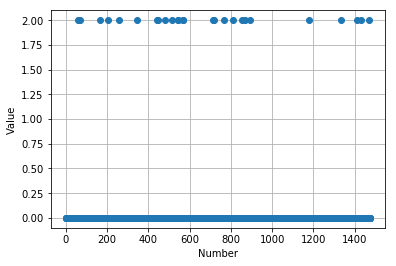

In [94]:
#plotting graph for bot word

plt.plot(data2['no'],data2['Value'],'o')
plt.xlabel('Number')
plt.ylabel('Value')
#axes.set_xlim([1,data2.shape[0]])
#axes.set_ylim([1,3])
plt.grid(True)

In [95]:
#trying to remove accounts with zero followers/zero friends/zero tweets
#Bias obtained from given data

serial = -1
count = 0
unnec = []
for x in range(0, data2.shape[0]):
    try:
        serial = serial + 1
        if(data2.loc[serial, 'Value']==0):
            if(data2.loc[serial, 'statuses_count']==0 or data2.loc[serial, 'followers_count']==0 or 
               data2.loc[serial, 'friends_count']==0 ):
                data2.loc[serial, 'Value'] = 3
                count+=1
                
            
    except:
        pass
print("trying to search for accounts with followers, friends or tweets in 0")
print("if there is some accounts like that we will consider them as 'starter' humans and assign value 3")
print("total no. of accounts found with either zero follower or tweets or friends",count)
print("accuracy", count/data2.shape[0])

trying to search for accounts with followers, friends or tweets in 0
if there is some accounts like that we will consider them as 'starter' humans and assign value 3
total no. of accounts found with either zero follower or tweets or friends 24
accuracy 0.016260162601626018


In [96]:
#trying to filter accounts usually used by comman man (not celebrities or verified users)
serial = -1
count = 0
unnec = []
for x in range(0, data2.shape[0]):
    try:
        serial = serial + 1
        if(data2.loc[serial, 'Value']==0):
            if((data2.loc[serial, 'statuses_count']/data2.loc[serial, 'followers_count']<12 
                or data2.loc[serial, 'statuses_count']/data2.loc[serial, 'friends_count']<12)):
                data2.loc[serial, 'Value'] = 3
                count+= 1
    except:
        pass
print("trying to filter accounts usually used by comman man (not celebrities or verified users)")
print("comman users have low tweet/following or tweet/friends and assigned value 3")
print("total no. of normal/comman users: ",count)
print("accuracy", count/data2.shape[0])

trying to filter accounts usually used by comman man (not celebrities or verified users)
comman users have low tweet/following or tweet/friends and assigned value 3
total no. of normal/comman users:  1325
accuracy 0.8976964769647696


plotting graph to display the ratio of tweets to followers and friends


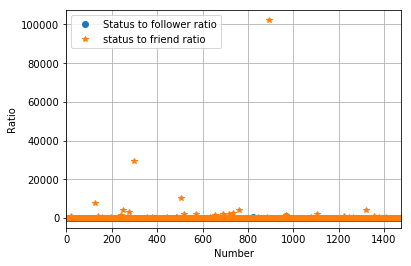

In [97]:
plt.plot(data2['no'],data2['statuses_count']/data2['followers_count'],'o', label = 'Status to follower ratio')
plt.xlabel('Number')
plt.ylabel('tweets to followers ratio')
axes = plt.gca()
axes = plt.gca()
axes.set_xlim([0,data2.shape[0]])

plt.grid(True)
plt.plot(data2['no'],data2['statuses_count']/data2['friends_count'],'*', label = "status to friend ratio")
plt.xlabel('Number')
plt.ylabel('Ratio')
plt.legend()
axes = plt.gca()
axes = plt.gca()
#axes.set_xlim([0,50])
#axes.set_ylim([0,4])
plt.grid(True)
print("plotting graph to display the ratio of tweets to followers and friends")

plotting graph at a lower ratio of ratio of tweets to followers and friends


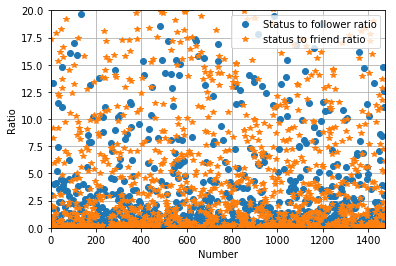

In [98]:
plt.plot(data2['no'],data2['statuses_count']/data2['followers_count'],'o', label = 'Status to follower ratio')
plt.xlabel('Number')
plt.ylabel('tweets to followers ratio')
axes = plt.gca()
axes = plt.gca()
axes.set_xlim([0,data2.shape[0]])
axes.set_ylim([0,20])

plt.grid(True)
plt.plot(data2['no'],data2['statuses_count']/data2['friends_count'],'*', label = "status to friend ratio")
plt.xlabel('Number')
plt.ylabel('Ratio')
plt.legend()
axes = plt.gca()
axes = plt.gca()
axes.set_ylim([0,20])
#axes.set_xlim([0,50])
#axes.set_ylim([0,4])
plt.grid(True)
print("plotting graph at a lower ratio of ratio of tweets to followers and friends")

In [99]:
#trying to filter accounts which are verified all the verified user accounts are humans
#because twitter verifies users only 
serial = -1
count = 0
unnec = []
for x in range(0, data2.shape[0]):
    try:
        serial = serial + 1
        if(data2.loc[serial, 'verified']==1):
            data2.loc[serial, 'Value'] = 3
            count+= 1
    except:
        pass
print("trying to filter accounts which are verified all the verified user accounts are humans")
print("twitter user accounts which are verified are assigned to value 3")
print("total no. of verified users:", count)
print("accuracy", count/data2.shape[0])

trying to filter accounts which are verified all the verified user accounts are humans
twitter user accounts which are verified are assigned to value 3
total no. of verified users: 645
accuracy 0.4369918699186992


plotting graph to display the verified users


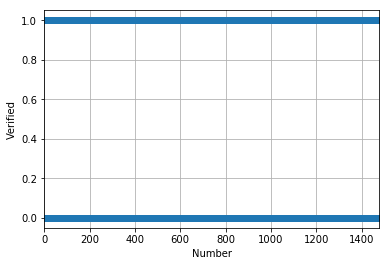

In [100]:
plt.plot(data2['no'],data2['verified'],'o')
plt.xlabel('Number')
plt.ylabel('Verified')
axes = plt.gca()
axes = plt.gca()
axes.set_xlim([0,data2.shape[0]])
plt.grid(True)

print("plotting graph to display the verified users")

In [101]:
#there might be some clever bots who dont have any description but follow huge number of poeople or they are followed
#by huge number.
serial = -1
count = 0
unnec = []
for x in range(0, data2.shape[0]):
    try:
        serial = serial + 1
        if(data.loc[serial, 'Value']==1 or data.loc[serial, 'Value']==0):
            if((data2.loc[serial, 'statuses_count']/data2.loc[serial, 'followers_count']>10 
                or data2.loc[serial, 'statuses_count']/data2.loc[serial, 'friends_count']>10)):
                data2.loc[serial, 'Value'] = 2
                count+= 1
    except:
        pass
print("huge tweeting accounts")
print("huge rate tweet accounts are considered bots and retained values 2")
print("total no. of clever bots are:", count)
print("accuracy", count/data2.shape[0])

huge tweeting accounts
huge rate tweet accounts are considered bots and retained values 2
total no. of clever bots are: 0
accuracy 0.0


plotting graph to display the ratio of tweets to followers and friends


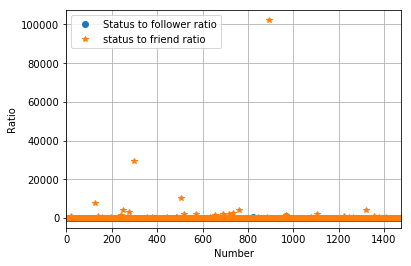

In [102]:
plt.plot(data2['no'],data2['statuses_count']/data2['followers_count'],'o', label = 'Status to follower ratio')
plt.xlabel('Number')
plt.ylabel('tweets to followers ratio')
axes = plt.gca()
axes = plt.gca()
axes.set_xlim([0,data2.shape[0]])

plt.grid(True)
plt.plot(data2['no'],data2['statuses_count']/data2['friends_count'],'*', label = "status to friend ratio")
plt.xlabel('Number')
plt.ylabel('Ratio')
plt.legend()
axes = plt.gca()
axes = plt.gca()
#axes.set_xlim([0,50])
#axes.set_ylim([0,4])
plt.grid(True)
print("plotting graph to display the ratio of tweets to followers and friends")

In [103]:
print("preparing data for calculation of accuracy")
serial = -1
count = 0
unnec = []
for x in range(0, data2.shape[0]):
    try:
        serial = serial + 1
        if(data2.loc[serial, 'Value']==2):
            data2.loc[serial, 'Value'] = 0
        else:
            data2.loc[serial, 'Value'] = 1
        count+= 1
    except:
        pass
print("completely prepared data for accuracy calculation")

preparing data for calculation of accuracy
completely prepared data for accuracy calculation


In [104]:
data_value = data2['Value']
datafinal = data2['user']
print("Accuracy Score: ", (accuracy_score(datafinal, data_value)))
cnf_matrix = confusion_matrix(datafinal, data_value)
print("Confusion Matrix:")
print(cnf_matrix)

Accuracy Score:  0.983739837398
Confusion Matrix:
[[   0    0]
 [  24 1452]]


In [105]:
TP = 0
FP = 0
TN = 0
FN = 0
for i in range(len(data_value)): 
    if datafinal[i]==data_value[i]==1:
        TP += 1
        #print(i)
for i in range(len(data_value)): 
    if data_value[i]==1 and datafinal[i]!=data_value[i]:
        FP += 1
        #print(i)
for i in range(len(data_value)): 
    if datafinal[i]==data_value[i]==0:
        TN += 1
        #print(i)
for i in range(len(data_value)): 
    if data_value[i]==0 and datafinal[i]!=data_value[i]:
        FN += 1
        #print(i)